In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np

train_data=np.load("/content/drive/MyDrive/age dataset/train_data.npy")
train_target=np.load("/content/drive/MyDrive/age dataset/train_target.npy")

In [2]:
import numpy as np
train_data=np.load("train_data.npy")
train_target=np.load("train_target.npy")

In [3]:
print(train_data.shape,train_target.shape)

(1100707, 9) (1100707,)


In [4]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model=Sequential()
model.add(Dense(64,input_dim=train_data.shape[1],activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="relu"))

model.compile(loss="mse",metrics=["mae"],optimizer="sgd")
model.summary()

Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1


2022-07-13 04:07:26.036934: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-13 04:07:26.037169: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 17,281
Trainable params: 17,281
Non-trainable params: 0
_________________________________________________________________


In [5]:
history=model.fit(train_data,train_target,validation_split=0.1,epochs=20,batch_size=32)

2022-07-13 04:09:19.138793: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-13 04:09:19.140045: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2022-07-13 04:09:24.633548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30958/30958 [==============================] - ETA: 0s - loss: 0.0097 - mae: 0.0771

2022-07-13 04:11:39.930090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30958/30958 [==============================] - 150s 5ms/step - loss: 0.0097 - mae: 0.0771 - val_loss: 0.0091 - val_mae: 0.0754
Epoch 2/20
30958/30958 [==============================] - 209s 7ms/step - loss: 0.0091 - mae: 0.0752 - val_loss: 0.0091 - val_mae: 0.0753
Epoch 3/20
30958/30958 [==============================] - 143s 5ms/step - loss: 0.0091 - mae: 0.0753 - val_loss: 0.0091 - val_mae: 0.0748
Epoch 4/20
30958/30958 [==============================] - 160s 5ms/step - loss: 0.0091 - mae: 0.0753 - val_loss: 0.0091 - val_mae: 0.0755
Epoch 5/20
 5288/30958 [====>.........................] - ETA: 1:56 - loss: 0.0091 - mae: 0.0754

KeyboardInterrupt: 

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

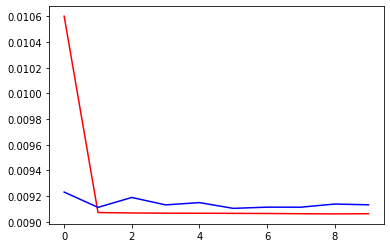

In [9]:

plt.plot(history.history["loss"],"r")
plt.plot(history.history["val_loss"],"b")
plt.show()

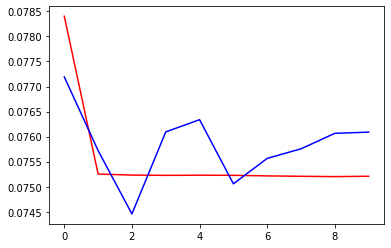

In [12]:
plt.plot(history.history["mae"],"r")
plt.plot(history.history["val_mae"],"b")


Save model

In [6]:
model.save_weights("age_dataset_weights.h5")
model.save("age_dataset_model.model")

INFO:tensorflow:Assets written to: age_dataset_model.model/assets
